In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
import tensorflow as tf
import tensorflow

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=False)

import matplotlib
matplotlib.use("Pdf")
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [7]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()

In [9]:
sess = tf.InteractiveSession()

In [10]:
sess.run(init)
for i in range(20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    batch_size = 7000
    print(i, sess.run(accuracy, feed_dict={x: mnist.test.images[0:batch_size], y_: mnist.test.labels[0:batch_size]}))

(0, 0.40014285)
(1, 0.36442858)
(2, 0.49728572)
(3, 0.41957143)
(4, 0.56185716)
(5, 0.51599997)
(6, 0.59842855)
(7, 0.63585716)
(8, 0.72257143)
(9, 0.7772857)
(10, 0.80614287)
(11, 0.76214284)
(12, 0.68214285)
(13, 0.67900002)
(14, 0.74771428)
(15, 0.77157146)
(16, 0.77742857)
(17, 0.78685713)
(18, 0.80014288)
(19, 0.71128571)


In [11]:
sess.run(init)
learningRate = 0.001
for i in range(10):
    batch_size = 700
    print(
        i,
        sess.run(accuracy, feed_dict={x: mnist.test.images[0:batch_size], y_: mnist.test.labels[0:batch_size]}),
        sess.run(tf.reduce_sum(tf.abs(Wdelta)), feed_dict={x: mnist.test.images[0:batch_size], y_: mnist.test.labels[0:batch_size]})
    )
    
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    Wdelta = -learningRate * tf.gradients(cross_entropy, W)[0]
    bdelta = -learningRate * tf.gradients(cross_entropy, b)[0]
    
    sess.run(W.assign_add(Wdelta), feed_dict={x: batch_xs, y_: batch_ys})
    sess.run(b.assign_add(bdelta), feed_dict={x: batch_xs, y_: batch_ys})

NameError: name 'Wdelta' is not defined

In [12]:
sess.run(init)
learningRate = 0.001

for i in range(3):
    batch_size = 700
    print(
            i,
            sess.run(accuracy, feed_dict={x: mnist.test.images[0:batch_size], y_: mnist.test.labels[0:batch_size]})
        )
    
    batch_xs, batch_ys = mnist.train.next_batch(100)
    feed_dict={x: batch_xs, y_: batch_ys}
    
    
    firstDerivative = tf.gradients(cross_entropy, b)[0]
    print(sess.run(firstDerivative, feed_dict=feed_dict))
    secondDerivative = tf.gradients(firstDerivative, b)[0]
    print(sess.run(secondDerivative, feed_dict=feed_dict))
    secondDerivative = tf.abs(secondDerivative)
    secondDerivative = tf.add(secondDerivative, 1)
    delta = -learningRate * tf.div(firstDerivative, secondDerivative)
    
    sess.run(b.assign_add(delta), feed_dict=feed_dict)
    
    
    firstDerivative = tf.gradients(cross_entropy, W)[0]
    secondDerivative = tf.gradients(firstDerivative, W)[0]
    secondDerivative = tf.abs(secondDerivative)
    secondDerivative = tf.add(secondDerivative, 0.01)
    delta = -learningRate * firstDerivative#tf.div(firstDerivative, secondDerivative)
    
    sess.run(W.assign_add(delta), feed_dict=feed_dict)

(0, 0.085714288)
[ -2.000e+00  -3.000e+00   1.000e+00   1.000e+00   1.000e+00   2.000e+00
   2.000e+00   5.364e-07   1.000e+00  -3.000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(1, 0.31142858)
[ 1.194 -1.973  0.04  -0.124  0.309 -1.834  1.368  3.667 -3.811  1.163]
[  2.018e-07   1.426e-07   2.160e-07   1.902e-07   1.114e-08   2.271e-07
   1.311e-07   2.449e-07   1.151e-07   1.737e-07]
(2, 0.37857142)
[ 1.158  1.791  1.437 -0.433 -0.009 -1.493 -2.945 -1.357  6.119 -4.267]
[  8.478e-08   9.612e-08   1.473e-07   5.997e-08   6.334e-08  -5.129e-08
   2.443e-09   1.259e-07   1.294e-07   4.625e-08]


In [13]:
print(sess.run(tf.reduce_sum(W)))

5.96046e-07


In [14]:
batch_xs, batch_ys = mnist.train.next_batch(100)
feed_dict={x: batch_xs, y_: batch_ys}

In [15]:
print(sess.run(tf.gradients(cross_entropy, b)[0], feed_dict=feed_dict))

[-0.283 -0.283 -2.492  1.038  0.79  -2.216  2.811 -6.239  0.33   6.545]


In [16]:
print(sess.run(b))

[-0.     0.003 -0.002 -0.    -0.001  0.001 -0.    -0.002 -0.003  0.006]


In [17]:
print(sess.run(tf.reduce_max(W)))

0.0183696


In [18]:
dW = tf.gradients(cross_entropy, W)[0]
ddW = tf.gradients(dW, W)[0]
print(sess.run(tf.reduce_max(ddW), feed_dict=feed_dict))

4.00597e-05


In [19]:
db = tf.gradients(cross_entropy, b)[0]
ddb = tf.gradients(db, b)[0]

print(sess.run(b, feed_dict=feed_dict))
print(sess.run(db, feed_dict=feed_dict))
print(sess.run(ddb, feed_dict=feed_dict))

[-0.     0.003 -0.002 -0.    -0.001  0.001 -0.    -0.002 -0.003  0.006]
[-0.283 -0.283 -2.492  1.038  0.79  -2.216  2.811 -6.239  0.33   6.545]
[  1.520e-07   1.058e-07   1.407e-07   9.704e-08   1.120e-07   9.464e-08
  -5.813e-08  -4.298e-08   1.367e-07   4.871e-08]


In [20]:
sess.run(b.assign_add([0, -.1, 0, 0, 0, 0, 0, 0, 0, 0]))

array([-0.   , -0.097, -0.002, -0.   , -0.001,  0.001, -0.   , -0.002,
       -0.003,  0.006], dtype=float32)

In [21]:
db = tf.gradients(cross_entropy, b)[0]
ddb = tf.gradients(db, b)[0]

print(sess.run(b, feed_dict=feed_dict))
print(sess.run(db, feed_dict=feed_dict))
print(sess.run(ddb, feed_dict=feed_dict))
print(sess.run(accuracy, feed_dict=feed_dict))

[-0.    -0.097 -0.002 -0.    -0.001  0.001 -0.    -0.002 -0.003  0.006]
[-0.189 -1.044 -2.404  1.123  0.863 -2.134  2.893 -6.166  0.417  6.641]
[  2.348e-07   1.644e-07   3.167e-07   1.214e-07   1.034e-07   5.394e-08
   1.112e-07   1.369e-07   1.454e-07   2.489e-07]
0.47


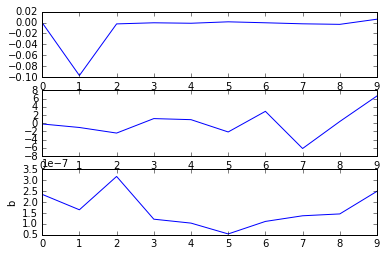

In [33]:
plt.subplot(311)
plt.plot(sess.run(b, feed_dict=feed_dict))

plt.subplot(312)
plt.plot(sess.run(db, feed_dict=feed_dict))

plt.subplot(313)
plt.plot(sess.run(ddb, feed_dict=feed_dict))

plt.ylabel('b')
plt.show()

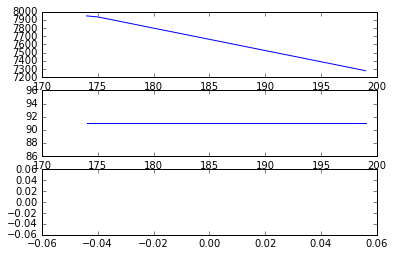

In [99]:
db = tf.gradients(cross_entropy, b)[0]
ddb = tf.gradients(db, b)[0]

dbs = []
ddbs = []
ces = []

for i in xrange(200):
    sess.run(b.assign_add([0, -.3, 0, 0, 0, 0, 0, 0, 0, 0]))
    """
    print(sess.run(b, feed_dict=feed_dict))
    print(sess.run(db, feed_dict=feed_dict))
    print(sess.run(ddb, feed_dict=feed_dict))
    print(sess.run(accuracy, feed_dict=feed_dict))
    """
    ces.append(sess.run(cross_entropy, feed_dict=feed_dict))
    dbs.append(sess.run(db, feed_dict=feed_dict)[1])
    ddbs.append(sess.run(ddb, feed_dict=feed_dict)[1])


plt.subplot(311)
plt.plot(ces)

plt.subplot(312)
plt.plot(dbs)

plt.subplot(313)
plt.plot(ddbs)


plt.show()

In [95]:
test = tf.Variable([5, 3])
func = tf.mul(test, tf.mul(test, test))
dfunc = tf.gradients(func, test)[0]
ddfunc = tf.gradients(dfunc, test)[0]

sess.run(tf.initialize_all_variables())
print(sess.run(func))
print(sess.run(dfunc))
print(sess.run(ddfunc))

[125  27]
[75 27]
[30 18]


In [92]:
yo = tf.Variable(1)
sess.run(yo)

FailedPreconditionError: Attempting to use uninitialized value Variable_20
	 [[Node: _send_Variable_20_0 = _Send[T=DT_INT32, client_terminated=true, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=-179382830170113035, tensor_name="Variable_20:0", _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_20)]]